In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchinfo import summary
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
import torch.utils.data as data
from torchvision import transforms
import torchvision

import sys,os
sys.path.append(os.pardir)

import py_func.Deep_learning_torch_func as DL
import py_func.models_func as my_model
import py_func.dat_rb_func as drb
import py_func.my_numpy_class as mnc
import py_func.my_torch_class as mtc
import py_func.models_func as my_model

import py_func.Deep_learning_torch_func as DL
import py_func.dat_rb_func as drb

In [2]:
from torchinfo import summary

In [ ]:
#実験

In [2]:
sim = mnc.My_numpy(1, './dat/experiment/SLM/m_1_23000_fps2_N10_lsd_mean.dat')
sim.simread(23000, 1600)
sim.data.shape

(23000, 1600)

In [ ]:
#同じ日にとったデータを学習と評価・テストにわける
#カーネル最初大きく、最後小さいほうが良い？
#プーリングを全結合の直前に入れない
#

In [72]:
dp='../dat/experiment/SLM/mean/m_1_30000_fps2_N10_lsd_mean.dat'

dp_label='../dat/label/mnist_label.dat'

#28000を訓練、1000を評価、1000をテスト,テストは後で使う
m_set_t,m_set_v=DL.mysim_to_dataset_ver2(dp, dp_label, 1600, 30000, 1, 40, 40, True, 29000, True)

batch=256
norm_loader_m_t = DataLoader(m_set_t, batch_size = batch, shuffle = True)
norm_loader_m_v = DataLoader(m_set_v, batch_size = batch, shuffle = False)

In [73]:

input_channel = 1
output_channel = [16, 32]
kernel_size = [3, 3]
pool_list = [1, 1]

criterion = nn.NLLLoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = my_model.simnet_cnn_allsize_ver6(len(output_channel), input_channel, 40, 40, output_channel, kernel_size, pool_list, 10, 0.5, 128).to(device)


In [74]:
summary(model = model, input_size = (1,1,40,40), depth = 4)

Layer (type:depth-idx)                   Output Shape              Param #
simnet_cnn_allsize_ver6                  --                        --
├─Conv_Bn_ReLU_Pool: 1-1                 [1, 16, 38, 38]           --
│    └─Sequential: 2-1                   [1, 16, 38, 38]           --
│    │    └─Conv2d: 3-1                  [1, 16, 38, 38]           160
│    │    └─BatchNorm2d: 3-2             [1, 16, 38, 38]           32
│    │    └─ReLU: 3-3                    [1, 16, 38, 38]           --
│    │    └─MaxPool2d: 3-4               [1, 16, 38, 38]           --
├─Sequential: 1-2                        [1, 32, 36, 36]           --
│    └─Conv_Bn_ReLU_Pool: 2-2            [1, 32, 36, 36]           --
│    │    └─Sequential: 3-5              [1, 32, 36, 36]           --
│    │    │    └─Conv2d: 4-1             [1, 32, 36, 36]           4,640
│    │    │    └─BatchNorm2d: 4-2        [1, 32, 36, 36]           64
│    │    │    └─ReLU: 4-3               [1, 32, 36, 36]           --
│    │    │

エポック1------------------------------
val_acc0.1100 ,train_acc0.1777
epochtime:0.0439分
エポック2------------------------------
val_acc0.1860 ,train_acc0.3070
epochtime:0.0391分
エポック3------------------------------
val_acc0.2030 ,train_acc0.3676
epochtime:0.0392分
エポック4------------------------------
val_acc0.2430 ,train_acc0.3994
epochtime:0.0425分
エポック5------------------------------
val_acc0.2450 ,train_acc0.4336
epochtime:0.0391分
エポック6------------------------------
val_acc0.2730 ,train_acc0.4639
epochtime:0.0390分
エポック7------------------------------
val_acc0.2820 ,train_acc0.4831
epochtime:0.0422分
エポック8------------------------------
val_acc0.3210 ,train_acc0.5041
epochtime:0.0399分
エポック9------------------------------
val_acc0.3420 ,train_acc0.5301
epochtime:0.0393分
エポック10------------------------------
val_acc0.3550 ,train_acc0.5465
epochtime:0.0421分
エポック11------------------------------
val_acc0.3700 ,train_acc0.5600
epochtime:0.0389分
エポック12------------------------------
val_acc0.3840 ,train_acc0.

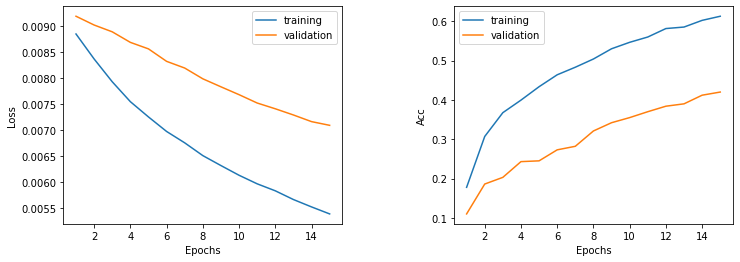

In [75]:
#30000枚
optimizer = optim.Adam(model.parameters(), lr=0.00001)

epochs = 15

#training
tl, vl, ta, va = DL.train_model_ver3(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, epochs, device, \
                                    False, None, False, None)

# torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl, tas = ta, vas = va)

エポック1------------------------------
val_acc0.2500 ,train_acc0.2347
epochtime:0.0331分
エポック2------------------------------
val_acc0.3470 ,train_acc0.3315
epochtime:0.0295分
エポック3------------------------------
val_acc0.4000 ,train_acc0.3816
epochtime:0.0295分
エポック4------------------------------
val_acc0.4480 ,train_acc0.4210
epochtime:0.0295分
エポック5------------------------------
val_acc0.4630 ,train_acc0.4502
epochtime:0.0327分
エポック6------------------------------
val_acc0.4770 ,train_acc0.4791
epochtime:0.0295分
エポック7------------------------------
val_acc0.5130 ,train_acc0.4920
epochtime:0.0296分
エポック8------------------------------
val_acc0.5320 ,train_acc0.5265
epochtime:0.0329分
エポック9------------------------------
val_acc0.5380 ,train_acc0.5401
epochtime:0.0295分
エポック10------------------------------
val_acc0.5440 ,train_acc0.5565
epochtime:0.0298分
エポック11------------------------------
val_acc0.5440 ,train_acc0.5697
epochtime:0.0295分
エポック12------------------------------
val_acc0.5620 ,train_acc0.

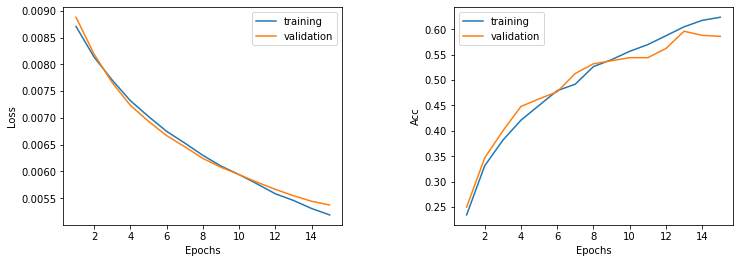

In [70]:
#23000枚
optimizer = optim.Adam(model.parameters(), lr=0.00001)

epochs = 15

#training
tl, vl, ta, va = DL.train_model_ver3(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, epochs, device, \
                                    False, None, False, None)

# torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl, tas = ta, vas = va)

エポック1------------------------------
val_acc0.1020 ,train_acc0.0935
epochtime:0.0335分
エポック2------------------------------
val_acc0.0960 ,train_acc0.0927
epochtime:0.0335分
エポック3------------------------------
val_acc0.1050 ,train_acc0.0979
epochtime:0.0335分
エポック4------------------------------
val_acc0.1100 ,train_acc0.1275
epochtime:0.0368分
エポック5------------------------------
val_acc0.1030 ,train_acc0.1542
epochtime:0.0335分
エポック6------------------------------
val_acc0.1090 ,train_acc0.1848
epochtime:0.0335分
エポック7------------------------------
val_acc0.1190 ,train_acc0.2129
epochtime:0.0368分
エポック8------------------------------
val_acc0.1300 ,train_acc0.2438
epochtime:0.0339分
エポック9------------------------------
val_acc0.1460 ,train_acc0.2726
epochtime:0.0342分
エポック10------------------------------
val_acc0.1520 ,train_acc0.2939
epochtime:0.0375分
エポック11------------------------------
val_acc0.1720 ,train_acc0.3219
epochtime:0.0340分
エポック12------------------------------
val_acc0.2080 ,train_acc0.

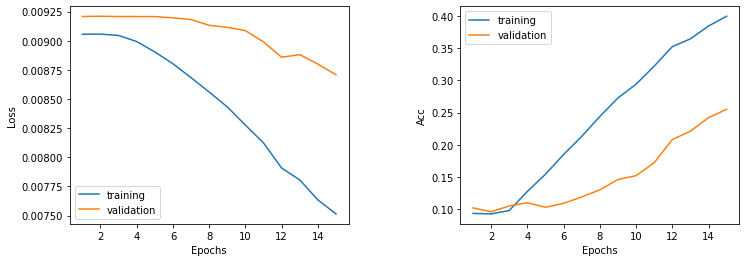

In [76]:
#30000枚
input_channel = 1
output_channel = [16, 32]
kernel_size = [3, 3]
criterion = nn.NLLLoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = my_model.simnet_cnn_allsize_ver4(len(output_channel), input_channel, 40, 40, output_channel, kernel_size, 10, 0.5, 128).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.00001)

epochs = 15

#training
tl, vl, ta, va = DL.train_model_ver3(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, epochs, device, \
                                    False, None, False, None)

DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl, tas = ta, vas = va)

エポック1------------------------------
val_acc0.1100 ,train_acc0.1063
epochtime:0.0289分
エポック2------------------------------
val_acc0.1060 ,train_acc0.1076
epochtime:0.0256分
エポック3------------------------------
val_acc0.1210 ,train_acc0.1167
epochtime:0.0256分
エポック4------------------------------
val_acc0.1400 ,train_acc0.1279
epochtime:0.0259分
エポック5------------------------------
val_acc0.1900 ,train_acc0.1610
epochtime:0.0288分
エポック6------------------------------
val_acc0.2040 ,train_acc0.1800
epochtime:0.0255分
エポック7------------------------------
val_acc0.2640 ,train_acc0.2108
epochtime:0.0255分
エポック8------------------------------
val_acc0.3180 ,train_acc0.2361
epochtime:0.0255分
エポック9------------------------------
val_acc0.3340 ,train_acc0.2642
epochtime:0.0291分
エポック10------------------------------
val_acc0.3800 ,train_acc0.2885
epochtime:0.0255分
エポック11------------------------------
val_acc0.4020 ,train_acc0.3187
epochtime:0.0255分
エポック12------------------------------
val_acc0.4090 ,train_acc0.

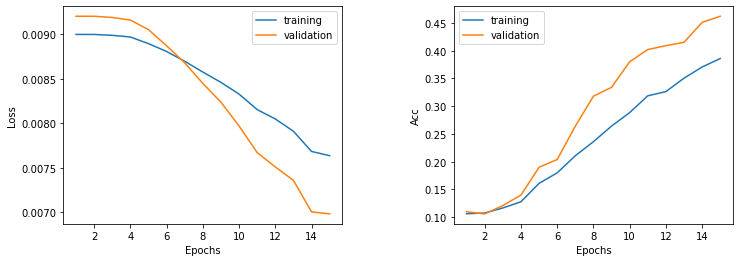

In [71]:
#23000枚
input_channel = 1
output_channel = [16, 32]
kernel_size = [3, 3]
criterion = nn.NLLLoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = my_model.simnet_cnn_allsize_ver4(len(output_channel), input_channel, 40, 40, output_channel, kernel_size, 10, 0.5, 128).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.00001)

epochs = 15

#training
tl, vl, ta, va = DL.train_model_ver3(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, epochs, device, \
                                    False, None, False, None)

DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl, tas = ta, vas = va)

エポック1------------------------------
val_acc0.0860 ,train_acc0.1151
epochtime:0.0339分
エポック2------------------------------
val_acc0.0860 ,train_acc0.1247
epochtime:0.0330分
エポック3------------------------------
val_acc0.0890 ,train_acc0.1479
epochtime:0.0324分
エポック4------------------------------
val_acc0.0880 ,train_acc0.1730
epochtime:0.0329分
エポック5------------------------------
val_acc0.0860 ,train_acc0.2011
epochtime:0.0326分
エポック6------------------------------
val_acc0.0880 ,train_acc0.2228
epochtime:0.0324分
エポック7------------------------------
val_acc0.0920 ,train_acc0.2477
epochtime:0.0327分
エポック8------------------------------
val_acc0.1000 ,train_acc0.2751
epochtime:0.0324分
エポック9------------------------------
val_acc0.0990 ,train_acc0.2976
epochtime:0.0324分
エポック10------------------------------
val_acc0.0980 ,train_acc0.3192
epochtime:0.0328分
エポック11------------------------------
val_acc0.1040 ,train_acc0.3325
epochtime:0.0331分
エポック12------------------------------
val_acc0.1210 ,train_acc0.

エポック97------------------------------
val_acc0.4920 ,train_acc0.8854
epochtime:0.0334分
エポック98------------------------------
val_acc0.4920 ,train_acc0.8881
epochtime:0.0330分
エポック99------------------------------
val_acc0.4890 ,train_acc0.8880
epochtime:0.0331分
エポック100------------------------------
val_acc0.5020 ,train_acc0.8922
epochtime:0.0339分
エポック101------------------------------
val_acc0.4960 ,train_acc0.8939
epochtime:0.0327分
エポック102------------------------------
val_acc0.4980 ,train_acc0.8940
epochtime:0.0327分
エポック103------------------------------
val_acc0.4980 ,train_acc0.8980
epochtime:0.0332分
エポック104------------------------------
val_acc0.5010 ,train_acc0.9001
epochtime:0.0339分
エポック105------------------------------
val_acc0.5010 ,train_acc0.9021
epochtime:0.0325分
エポック106------------------------------
val_acc0.5130 ,train_acc0.9015
epochtime:0.0337分
エポック107------------------------------
val_acc0.5100 ,train_acc0.9044
epochtime:0.0331分
エポック108------------------------------
val_acc0

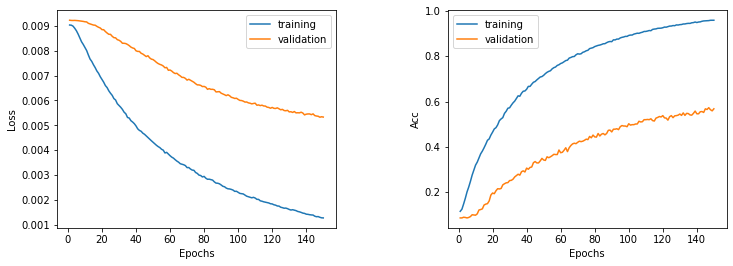

In [13]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)

epochs = 150

#training
tl, vl, ta, va = DL.train_model_ver3(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, epochs, device, \
                                    False, None, False, None)

torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl, tas = ta, vas = va)

In [15]:
model = my_model.simnet_cnn_allsize_ver4(len(output_channel), input_channel, 40, 40, output_channel, kernel_size, 10, 0.5, 128)

In [16]:
model

simnet_cnn_allsize_ver4(
  (CNN1): Conv_Bn_ReLu_He_weight(
    (CNN): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (CNNS): Sequential(
    (0): Conv_Bn_ReLu_He_weight(
      (CNN): Sequential(
        (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
  )
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=41472, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (drop): Dropout(p=0.5, inplace=False)
)

In [7]:
md_path='../torchpth/expe/id/m28000_expe_16-32.pth'

input_channel = 1
output_channel = [16, 32]
kernel_size = [3, 3]
criterion = nn.NLLLoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = my_model.simnet_cnn_allsize_ver4(len(output_channel), input_channel, 40, 40, output_channel, kernel_size, 10, 0.5, 128)
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.00001)

epochs = 150

#training
tl, vl, ta, va = DL.train_model_ver3(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, epochs, device, \
                                    False, None, False, None)

torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl, tas = ta, vas = va)

エポック1------------------------------
val_acc0.1020 ,train_acc0.1082
epochtime:0.0617分
エポック2------------------------------
val_acc0.1000 ,train_acc0.1237
epochtime:0.0331分
エポック3------------------------------
val_acc0.1000 ,train_acc0.1330
epochtime:0.0334分
エポック4------------------------------
val_acc0.1000 ,train_acc0.1532
epochtime:0.0329分
エポック5------------------------------
val_acc0.0970 ,train_acc0.1757
epochtime:0.0327分
エポック6------------------------------
val_acc0.1360 ,train_acc0.1996
epochtime:0.0324分
エポック7------------------------------
val_acc0.1640 ,train_acc0.2369
epochtime:0.0327分
エポック8------------------------------
val_acc0.1680 ,train_acc0.2517
epochtime:0.0327分
エポック9------------------------------
val_acc0.1760 ,train_acc0.2767
epochtime:0.0324分
エポック10------------------------------
val_acc0.1740 ,train_acc0.3038
epochtime:0.0330分
エポック11------------------------------
val_acc0.1730 ,train_acc0.3259
epochtime:0.0327分
エポック12------------------------------
val_acc0.1760 ,train_acc0.

エポック97------------------------------
val_acc0.5210 ,train_acc0.8722
epochtime:0.0322分
エポック98------------------------------
val_acc0.5350 ,train_acc0.8710
epochtime:0.0327分
エポック99------------------------------
val_acc0.5290 ,train_acc0.8719
epochtime:0.0322分
エポック100------------------------------
val_acc0.5470 ,train_acc0.8752
epochtime:0.0322分
エポック101------------------------------
val_acc0.5360 ,train_acc0.8792
epochtime:0.0327分
エポック102------------------------------
val_acc0.5450 ,train_acc0.8809
epochtime:0.0322分
エポック103------------------------------
val_acc0.5440 ,train_acc0.8836
epochtime:0.0322分
エポック104------------------------------
val_acc0.5480 ,train_acc0.8857
epochtime:0.0328分
エポック105------------------------------
val_acc0.5440 ,train_acc0.8871
epochtime:0.0323分
エポック106------------------------------
val_acc0.5430 ,train_acc0.8864
epochtime:0.0323分
エポック107------------------------------
val_acc0.5540 ,train_acc0.8906
epochtime:0.0327分
エポック108------------------------------
val_acc0

FileNotFoundError: [Errno 2] No such file or directory: './torchpth/expe/id/m28000_expe_16-32.pth'

In [9]:
summary(model = model, input_size = (1, 1, 40, 40))

Layer (type:depth-idx)                   Output Shape              Param #
simnet_cnn_allsize_ver4                  --                        --
├─Conv_Bn_ReLu_He_weight: 1-1            [1, 16, 38, 38]           --
│    └─Sequential: 2-1                   [1, 16, 38, 38]           --
│    │    └─Conv2d: 3-1                  [1, 16, 38, 38]           160
│    │    └─BatchNorm2d: 3-2             [1, 16, 38, 38]           32
│    │    └─ReLU: 3-3                    [1, 16, 38, 38]           --
├─Sequential: 1-2                        [1, 32, 36, 36]           --
│    └─Conv_Bn_ReLu_He_weight: 2-2       [1, 32, 36, 36]           --
│    │    └─Sequential: 3-4              [1, 32, 36, 36]           4,704
├─Flatten: 1-3                           [1, 41472]                --
├─Dropout: 1-4                           [1, 41472]                --
├─Linear: 1-5                            [1, 128]                  5,308,544
├─ReLU: 1-6                              [1, 128]                  --
├─Dr

エポック1------------------------------
val_acc0.103 ,train_acc0.10222727272727272
epochtime:0.07180995941162109分
エポック2------------------------------
val_acc0.133 ,train_acc0.11763636363636364
epochtime:0.0395591934521993分
エポック3------------------------------
val_acc0.167 ,train_acc0.14754545454545454
epochtime:0.03881927728652954分
エポック4------------------------------
val_acc0.187 ,train_acc0.18509090909090908
epochtime:0.038983758290608725分
エポック5------------------------------
val_acc0.277 ,train_acc0.2265
epochtime:0.039508283138275146分
エポック6------------------------------
val_acc0.332 ,train_acc0.26645454545454544
epochtime:0.038724418481191分
エポック7------------------------------
val_acc0.36 ,train_acc0.31
epochtime:0.03822067975997925分
エポック8------------------------------
val_acc0.421 ,train_acc0.35895454545454547
epochtime:0.03816491762797038分
エポック9------------------------------
val_acc0.482 ,train_acc0.4002727272727273
epochtime:0.038214457035064694分
エポック10------------------------------
val

エポック77------------------------------
val_acc0.7 ,train_acc0.9410454545454545
epochtime:0.03841392993927002分
エポック78------------------------------
val_acc0.709 ,train_acc0.9427272727272727
epochtime:0.03952759504318237分
エポック79------------------------------
val_acc0.692 ,train_acc0.9443636363636364
epochtime:0.03848819335301717分
エポック80------------------------------
val_acc0.705 ,train_acc0.9471818181818182
epochtime:0.03879671096801758分
エポック81------------------------------
val_acc0.694 ,train_acc0.9474090909090909
epochtime:0.03831419547398885分
エポック82------------------------------
val_acc0.701 ,train_acc0.9505
epochtime:0.0386133869489034分
エポック83------------------------------
val_acc0.706 ,train_acc0.9527272727272728
epochtime:0.03859334389368693分
エポック84------------------------------
val_acc0.706 ,train_acc0.9536363636363636
epochtime:0.038513652483622235分
エポック85------------------------------
val_acc0.695 ,train_acc0.9533181818181818
epochtime:0.03862896760304769分
エポック86------------------

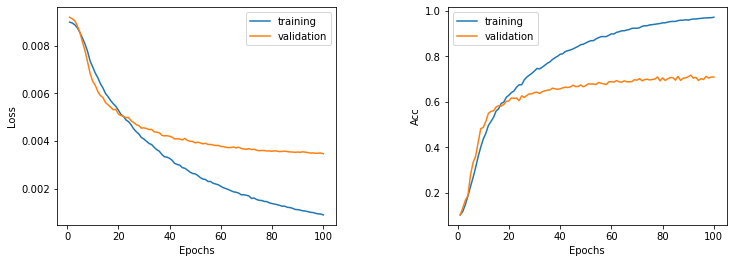

In [5]:
md_path='./torchpth/m22000_expe_16-64.pth'

input_channel = 1
output_channel = [16, 64]
kernel_size = [3, 3]
criterion = nn.NLLLoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = my_model.simnet_cnn_allsize_ver4(len(output_channel), input_channel, 40, 40, output_channel, kernel_size, 10, 0.5, 128)
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.00001)

epochs = 100

#training
tl, vl, ta, va = DL.train_model_ver3(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, epochs, device, \
                                    False, None, False, None)

torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl, tas = ta, vas = va)

エポック1------------------------------
val_acc0.1020 ,train_acc0.1068
epochtime:0.0531分
エポック2------------------------------
val_acc0.1020 ,train_acc0.1082
epochtime:0.0267分
エポック3------------------------------
val_acc0.0990 ,train_acc0.1265
epochtime:0.0267分
エポック4------------------------------
val_acc0.1820 ,train_acc0.1553
epochtime:0.0282分
エポック5------------------------------
val_acc0.1940 ,train_acc0.1838
epochtime:0.0271分
エポック6------------------------------
val_acc0.2570 ,train_acc0.2200
epochtime:0.0265分
エポック7------------------------------
val_acc0.3060 ,train_acc0.2520
epochtime:0.0271分
エポック8------------------------------
val_acc0.3320 ,train_acc0.2809
epochtime:0.0274分
エポック9------------------------------
val_acc0.3680 ,train_acc0.3016
epochtime:0.0264分
エポック10------------------------------
val_acc0.3840 ,train_acc0.3272
epochtime:0.0269分
エポック11------------------------------
val_acc0.4300 ,train_acc0.3506
epochtime:0.0266分
エポック12------------------------------
val_acc0.4470 ,train_acc0.

エポック97------------------------------
val_acc0.6900 ,train_acc0.8935
epochtime:0.0255分
エポック98------------------------------
val_acc0.6840 ,train_acc0.8915
epochtime:0.0260分
エポック99------------------------------
val_acc0.6880 ,train_acc0.8972
epochtime:0.0255分
エポック100------------------------------
val_acc0.6980 ,train_acc0.8985
epochtime:0.0255分
エポック101------------------------------
val_acc0.6910 ,train_acc0.9000
epochtime:0.0255分
エポック102------------------------------
val_acc0.6820 ,train_acc0.8992
epochtime:0.0258分
エポック103------------------------------
val_acc0.6890 ,train_acc0.9027
epochtime:0.0255分
エポック104------------------------------
val_acc0.6940 ,train_acc0.9050
epochtime:0.0255分
エポック105------------------------------
val_acc0.6870 ,train_acc0.9080
epochtime:0.0255分
エポック106------------------------------
val_acc0.6890 ,train_acc0.9086
epochtime:0.0258分
エポック107------------------------------
val_acc0.7010 ,train_acc0.9108
epochtime:0.0255分
エポック108------------------------------
val_acc0

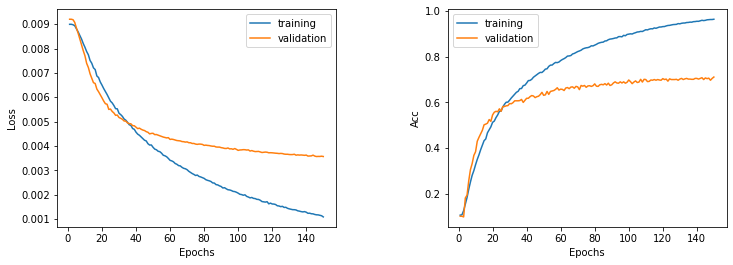

In [3]:
md_path='./torchpth/m22000_expe_16-32.pth'

input_channel = 1
output_channel = [16, 32]
kernel_size = [3, 3]
criterion = nn.NLLLoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = my_model.simnet_cnn_allsize_ver4(len(output_channel), input_channel, 40, 40, output_channel, kernel_size, 10, 0.5, 128)
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.00001)

epochs = 150

#training
tl, vl, ta, va = DL.train_model_ver3(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, epochs, device, \
                                    False, None, False, None)

torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl, tas = ta, vas = va)

エポック1------------------------------
val_acc0.1370 ,train_acc0.1136
epochtime:0.0161分
エポック2------------------------------
val_acc0.1240 ,train_acc0.1052
epochtime:0.0159分
エポック3------------------------------
val_acc0.1200 ,train_acc0.1056
epochtime:0.0171分
エポック4------------------------------
val_acc0.1240 ,train_acc0.1057
epochtime:0.0160分
エポック5------------------------------
val_acc0.1390 ,train_acc0.1101
epochtime:0.0160分
エポック6------------------------------
val_acc0.1550 ,train_acc0.1186
epochtime:0.0162分
エポック7------------------------------
val_acc0.1730 ,train_acc0.1258
epochtime:0.0165分
エポック8------------------------------
val_acc0.2000 ,train_acc0.1335
epochtime:0.0160分
エポック9------------------------------
val_acc0.2370 ,train_acc0.1498
epochtime:0.0160分
エポック10------------------------------
val_acc0.2560 ,train_acc0.1593
epochtime:0.0160分
エポック11------------------------------
val_acc0.2800 ,train_acc0.1766
epochtime:0.0164分
エポック12------------------------------
val_acc0.2850 ,train_acc0.

エポック97------------------------------
val_acc0.6330 ,train_acc0.7310
epochtime:0.0159分
エポック98------------------------------
val_acc0.6450 ,train_acc0.7354
epochtime:0.0159分
エポック99------------------------------
val_acc0.6450 ,train_acc0.7377
epochtime:0.0164分
エポック100------------------------------
val_acc0.6470 ,train_acc0.7412
epochtime:0.0159分
エポック101------------------------------
val_acc0.6450 ,train_acc0.7447
epochtime:0.0159分
エポック102------------------------------
val_acc0.6450 ,train_acc0.7458
epochtime:0.0159分
エポック103------------------------------
val_acc0.6360 ,train_acc0.7494
epochtime:0.0169分
エポック104------------------------------
val_acc0.6490 ,train_acc0.7517
epochtime:0.0160分
エポック105------------------------------
val_acc0.6500 ,train_acc0.7540
epochtime:0.0159分
エポック106------------------------------
val_acc0.6550 ,train_acc0.7560
epochtime:0.0164分
エポック107------------------------------
val_acc0.6500 ,train_acc0.7565
epochtime:0.0160分
エポック108------------------------------
val_acc0

エポック192------------------------------
val_acc0.6890 ,train_acc0.8899
epochtime:0.0160分
エポック193------------------------------
val_acc0.6840 ,train_acc0.8925
epochtime:0.0159分
エポック194------------------------------
val_acc0.6880 ,train_acc0.8917
epochtime:0.0159分
エポック195------------------------------
val_acc0.6870 ,train_acc0.8936
epochtime:0.0164分
エポック196------------------------------
val_acc0.6830 ,train_acc0.8958
epochtime:0.0159分
エポック197------------------------------
val_acc0.6890 ,train_acc0.8961
epochtime:0.0160分
エポック198------------------------------
val_acc0.6870 ,train_acc0.8985
epochtime:0.0160分
エポック199------------------------------
val_acc0.6900 ,train_acc0.8966
epochtime:0.0163分
エポック200------------------------------
val_acc0.6860 ,train_acc0.8981
epochtime:0.0159分
エポック201------------------------------
val_acc0.6870 ,train_acc0.9005
epochtime:0.0159分
エポック202------------------------------
val_acc0.6830 ,train_acc0.9001
epochtime:0.0164分
エポック203------------------------------
val_a

エポック287------------------------------
val_acc0.7050 ,train_acc0.9579
epochtime:0.0164分
エポック288------------------------------
val_acc0.7030 ,train_acc0.9592
epochtime:0.0159分
エポック289------------------------------
val_acc0.7090 ,train_acc0.9589
epochtime:0.0159分
エポック290------------------------------
val_acc0.7010 ,train_acc0.9592
epochtime:0.0159分
エポック291------------------------------
val_acc0.7020 ,train_acc0.9605
epochtime:0.0165分
エポック292------------------------------
val_acc0.7050 ,train_acc0.9607
epochtime:0.0160分
エポック293------------------------------
val_acc0.7000 ,train_acc0.9619
epochtime:0.0160分
エポック294------------------------------
val_acc0.7070 ,train_acc0.9614
epochtime:0.0160分
エポック295------------------------------
val_acc0.7040 ,train_acc0.9617
epochtime:0.0164分
エポック296------------------------------
val_acc0.7020 ,train_acc0.9628
epochtime:0.0160分
エポック297------------------------------
val_acc0.6990 ,train_acc0.9627
epochtime:0.0159分
エポック298------------------------------
val_a

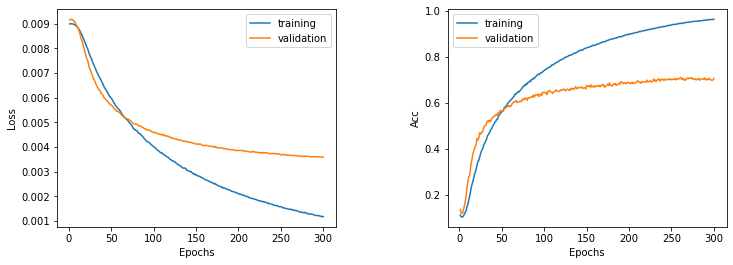

In [5]:
md_path='./torchpth/m22000_expe_8-16.pth'

input_channel = 1
output_channel = [8, 16]
kernel_size = [3, 3]
criterion = nn.NLLLoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = my_model.simnet_cnn_allsize_ver4(len(output_channel), input_channel, 40, 40, output_channel, kernel_size, 10, 0.5, 128)
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.00001)

epochs = 300

#training
tl, vl, ta, va = DL.train_model_ver3(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, epochs, device, \
                                    False, None, False, None)

torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl, tas = ta, vas = va)

In [4]:
sim = mnc.My_numpy(1, './dat/experiment/SLM/m_1_10000_fps2_N10_lsd_mean.dat')
sim.simread(10000, 1600)
sim.data.shape

(10000, 1600)

In [5]:
dp='./dat/experiment/SLM/m_1_10000_fps2_N10_lsd_mean.dat'

dp_label='./dat/label/mnist_label.dat'

m_set_t,m_set_v=DL.mysim_to_dataset_ver2(dp, dp_label, 1600, 10000, 1, 40, 40, True, 9500, True)

batch=256
norm_loader_m_t = DataLoader(m_set_t, batch_size = batch, shuffle = True)
norm_loader_m_v = DataLoader(m_set_v, batch_size = batch, shuffle = False)

エポック1------------------------------
val_acc0.156 ,train_acc0.10894736842105263
epochtime:0.016579914093017577分
エポック2------------------------------
val_acc0.14 ,train_acc0.12431578947368421
epochtime:0.01690468390782674分
エポック3------------------------------
val_acc0.188 ,train_acc0.1763157894736842
epochtime:0.01663882335027059分
エポック4------------------------------
val_acc0.21 ,train_acc0.2251578947368421
epochtime:0.016904807090759276分
エポック5------------------------------
val_acc0.218 ,train_acc0.28042105263157896
epochtime:0.016489219665527344分
エポック6------------------------------
val_acc0.24 ,train_acc0.3217894736842105
epochtime:0.016505869229634602分
エポック7------------------------------
val_acc0.282 ,train_acc0.3511578947368421
epochtime:0.016505873203277587分
エポック8------------------------------
val_acc0.318 ,train_acc0.3953684210526316
epochtime:0.01653906504313151分
エポック9------------------------------
val_acc0.334 ,train_acc0.4356842105263158
epochtime:0.01648923953374227分
エポック10--------

エポック76------------------------------
val_acc0.678 ,train_acc0.9470526315789474
epochtime:0.016655413309733073分
エポック77------------------------------
val_acc0.678 ,train_acc0.9501052631578948
epochtime:0.016904830932617188分
エポック78------------------------------
val_acc0.68 ,train_acc0.9484210526315789
epochtime:0.01685492197672526分
エポック79------------------------------
val_acc0.686 ,train_acc0.9514736842105264
epochtime:0.017104252179463705分
エポック80------------------------------
val_acc0.674 ,train_acc0.9516842105263158
epochtime:0.017087626457214355分
エポック81------------------------------
val_acc0.684 ,train_acc0.9518947368421052
epochtime:0.016854461034139分
エポック82------------------------------
val_acc0.692 ,train_acc0.9557894736842105
epochtime:0.017088107268015542分
エポック83------------------------------
val_acc0.682 ,train_acc0.9547368421052631
epochtime:0.01711911757787069分
エポック84------------------------------
val_acc0.684 ,train_acc0.9588421052631579
epochtime:0.016605591773986815分
エポック85-

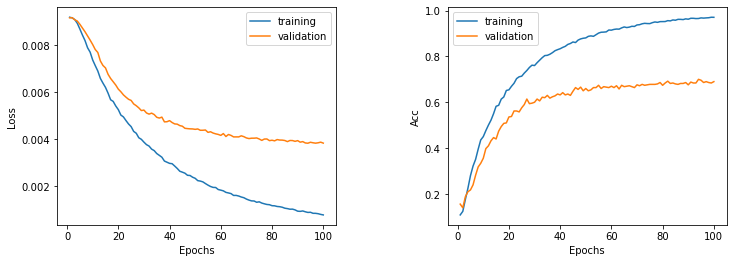

In [14]:
md_path='./torchpth/m_expe_16-64.pth'

input_channel = 1
output_channel = [16, 64]
kernel_size = [3, 3]
criterion = nn.NLLLoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = my_model.simnet_cnn_allsize_ver4(len(output_channel), input_channel, 40, 40, output_channel, kernel_size, 10, 0.5, 128)
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.00001)

epochs = 100

#training
tl, vl, ta, va = DL.train_model_ver3(norm_loader_m_t, norm_loader_m_v, model, criterion, optimizer, epochs, device, \
                                    False, None, False, None)

torch.save(model.state_dict(), md_path)
DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl, tas = ta, vas = va)

In [ ]:
#関東学生研究論文講演会

In [3]:
dp = './dat/simdat/pjr/1byte/lsd/m_500_a0.2_b3_f0.2_sim.dat'
dp_label='./dat/label/mnist_label.dat'
bp = './dat/bindat/1byte/m_28_1.dat'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

m_set_t,m_set_v=DL.mysim_to_dataset_ver2(dp, dp_label, 500, 70000, 1, 25, 20, True, 60000, True)

batch=256
norm_loader_m_t = DataLoader(m_set_t, batch_size = batch, shuffle = True)
norm_loader_m_v = DataLoader(m_set_v, batch_size = batch, shuffle = False)

In [5]:
set_t,set_v = DL.mysimbin_to_dataset_ver2(dp, bp, 500, 28, 28, 70000, 1, 1, True, 60000, False, False)

batch = 64
loader_m_t = DataLoader(set_t, batch_size = batch, shuffle = True)
loader_m_v = DataLoader(set_v, batch_size = batch, shuffle = False)

エポック1------------------------------
val_acc0.3790 ,train_acc0.3719
epochtime:0.6120分
エポック2------------------------------
val_acc0.4272 ,train_acc0.4242
epochtime:0.5866分
エポック3------------------------------
val_acc0.4547 ,train_acc0.4566
epochtime:0.5866分
エポック4------------------------------
val_acc0.4749 ,train_acc0.4823
epochtime:0.5849分
エポック5------------------------------
val_acc0.4940 ,train_acc0.5056
epochtime:0.5858分
エポック6------------------------------
val_acc0.4880 ,train_acc0.5062
epochtime:0.5860分
エポック7------------------------------
val_acc0.5155 ,train_acc0.5347
epochtime:0.5868分
エポック8------------------------------
val_acc0.5264 ,train_acc0.5474
epochtime:0.5869分
エポック9------------------------------
val_acc0.5182 ,train_acc0.5472
epochtime:0.5864分
エポック10------------------------------
val_acc0.5445 ,train_acc0.5677
epochtime:0.5865分
エポック11------------------------------
val_acc0.5468 ,train_acc0.5799
epochtime:0.5869分
エポック12------------------------------
val_acc0.5376 ,train_acc0.

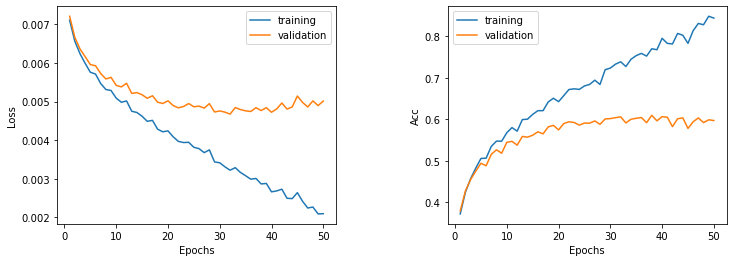

In [6]:
#識別モデル
input_channel = 1
output_channel = [32,64,128,256,512,1024]
kernel_size = [3,3,3,3,3,3]

model1 = my_model.simnet_cnn_allsize_ver2(len(output_channel), input_channel, output_channel, kernel_size, 10)
model1 = model1.to(device)
optimizer1 = optim.Adam(model1.parameters(), lr=0.00001)
criterion1 = nn.CrossEntropyLoss()

tl, vl, ta, va = DL.train_model_ver3(norm_loader_m_t, norm_loader_m_v, model1, criterion1, optimizer1, 50, device, \
  L1 = False, alpha = None, L2 = False, lamda = None)

md_path = "./torchpth/pjr/id/lsd/m_lsd_out28_id_e30_b64_b3.pth"
torch.save(model1.state_dict(), md_path)

DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl, vls = vl, tas = ta, vas = va)

In [8]:
#復元モデル
kernel_size = [6,4,4,4,4,4]
stride_list = [1,1,1,1,1,1]
padding_list = [2,2,2,2,2,2]
outpadding_list = [0,0,0,0,0,0]
in_channel_list = [1,64,128,256,128,64]
out_channel_list = [64,128,256,128,64,1]


model2 = my_model.simnet_decoder_allsize(500, 1024, 32, 32, kernel_size, stride_list, padding_list, outpadding_list, in_channel_list, \
                                        out_channel_list)
model2 = model2.to(device)
criterion2 = nn.MSELoss()
optimizer2 = optim.Adam(model2.parameters(), lr=0.1)

tl2, vl2 = DL.train_decode_model_ver2(loader_m_t, loader_m_v, model2, criterion2, optimizer2, 30, device)



エポック1--------------------------------
epochtime:1.9051047007242838分, train_loss:51.76413495279948, val_loss:52.073869360351566
エポック2--------------------------------
epochtime:1.906484305858612分, train_loss:47.57733118489583, val_loss:48.3263189453125
エポック3--------------------------------
epochtime:1.912218968073527分, train_loss:45.84293736165365, val_loss:46.909644140625
エポック4--------------------------------
epochtime:1.905071453253428分, train_loss:45.55571510009766, val_loss:47.22207888183594
エポック5--------------------------------
epochtime:1.9163745204607645分, train_loss:43.20721122639974, val_loss:44.880264184570315
エポック6--------------------------------
epochtime:1.9044896403948466分, train_loss:41.25747899576823, val_loss:43.072034399414065
エポック7--------------------------------
epochtime:1.9054869651794433分, train_loss:40.23710370686849, val_loss:42.26211877441406
エポック8--------------------------------
epochtime:1.904274086157481分, train_loss:39.94753023071289, val_loss:42.04891750488

NameError: name 'model6' is not defined

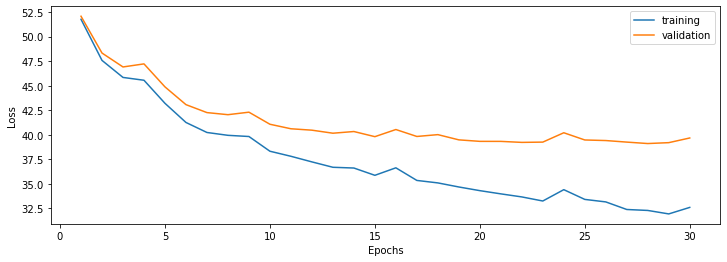

In [9]:
md_path = './torchpth/pjr/decode/m_lsd_out28_dec_e30_b64_b3.pth'
torch.save(model2.state_dict(), md_path)

DL.learning_curv_ver2( 12, 4, 10, 10, tls = tl2, vls = vl2)

In [10]:
sim = mnc.My_numpy(1, './dat/simdat/pjr/1byte/lsd/m_500_a0.2_b3_f0.2_sim.dat')
sim.simread(1000, 500)
sim.data.shape

(1000, 500)

In [11]:
labels = mnc.My_numpy(1, './dat/label/mnist_label.dat')
labels.labelread(1000)
labels.data.shape

(1000,)

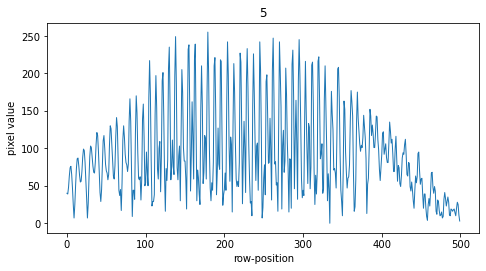

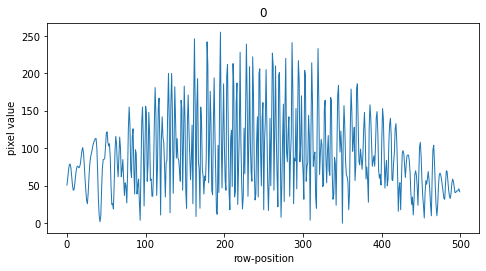

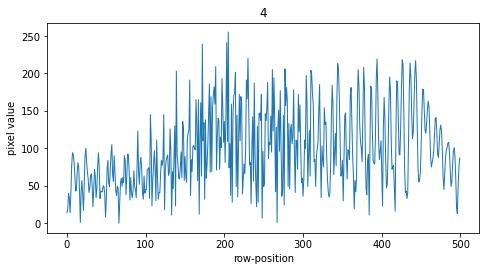

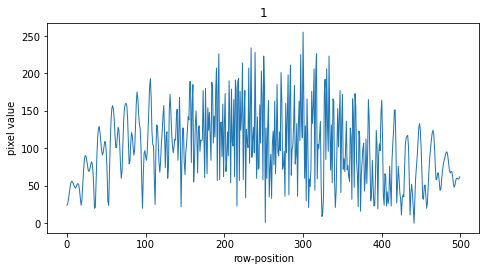

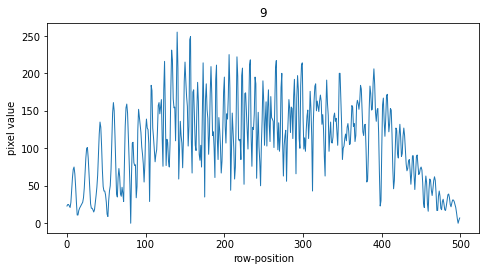

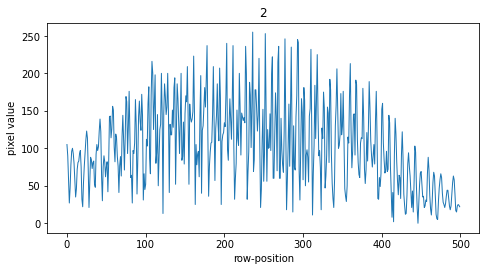

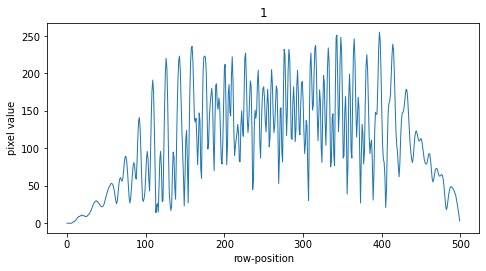

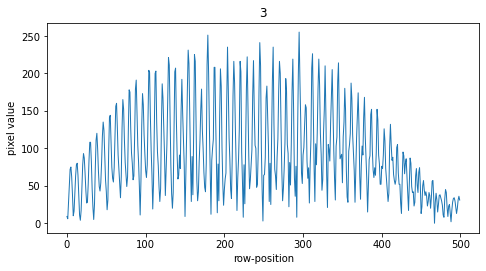

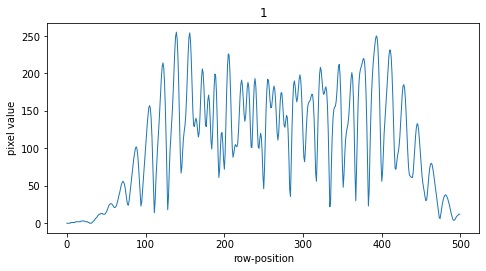

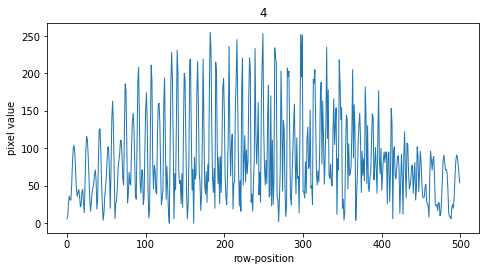

In [12]:
sim.save_simwave(1, 10, labels.data, 8, 4, 10, "./dat/simwave/kantou")

In [13]:
sim = mnc.My_numpy(1, './dat/simdat/pjr/1byte/lsd/m_500_a0.2_b2_f0.2_sim.dat')
sim.simread(1000, 500)
sim.data.shape

(1000, 500)

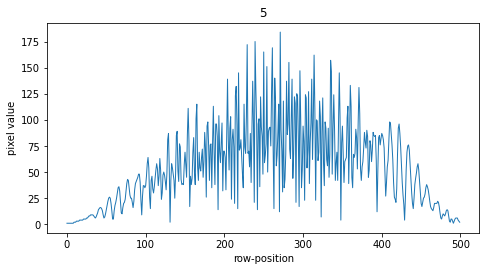

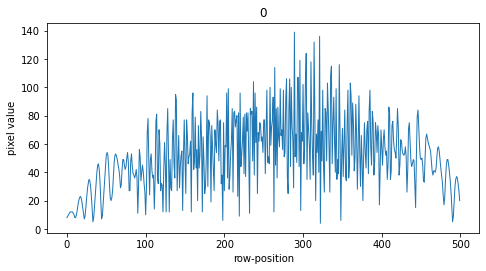

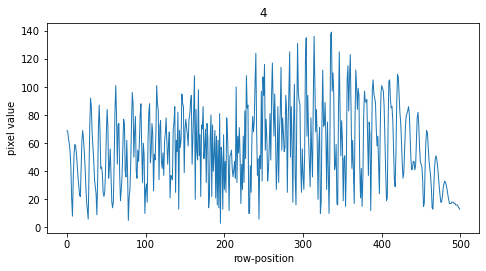

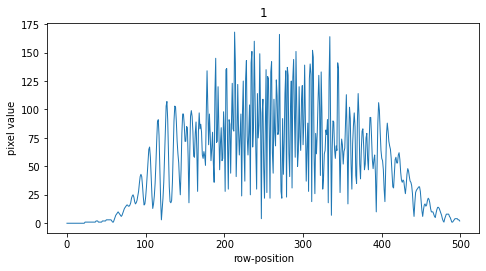

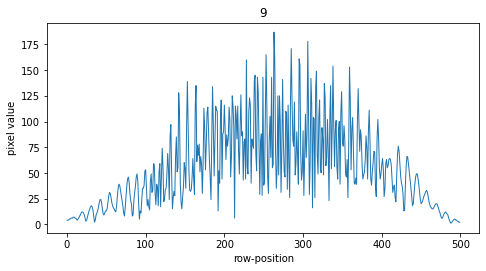

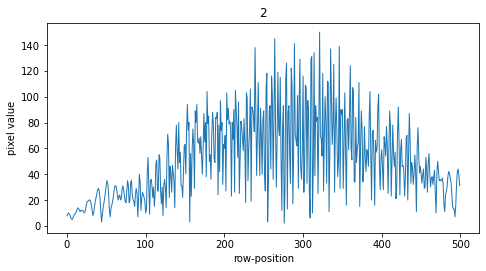

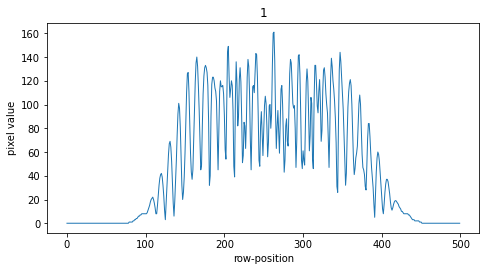

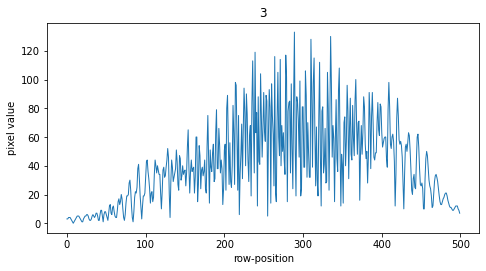

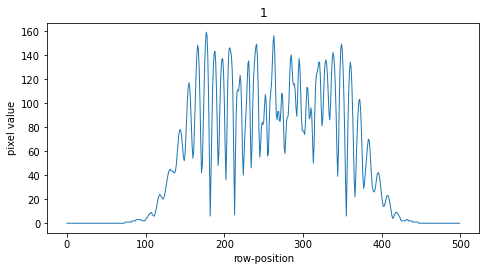

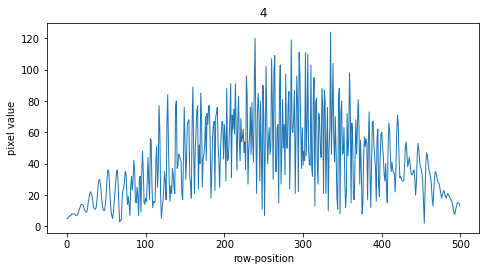

In [14]:
sim.save_simwave(1, 10, labels.data, 8, 4, 10, "./dat/simwave/kantou/m_lsd_2")

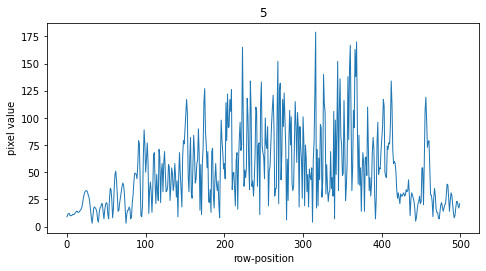

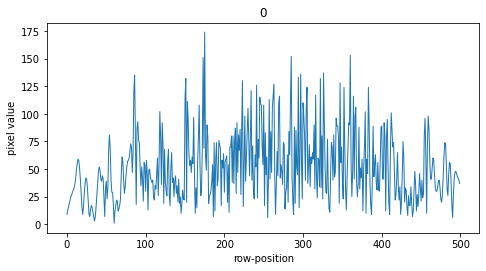

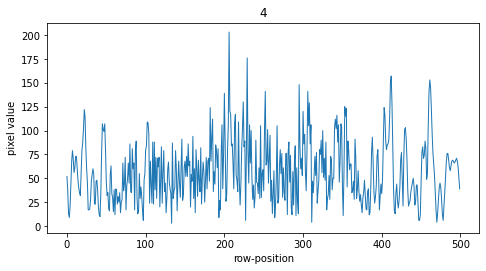

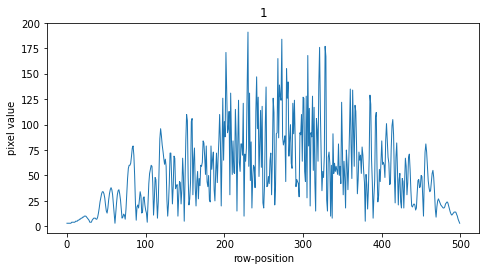

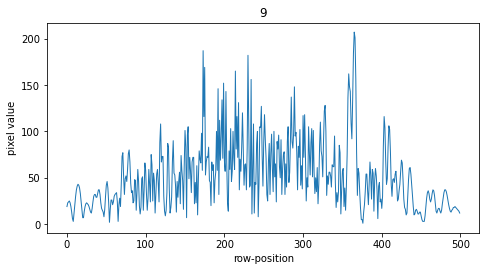

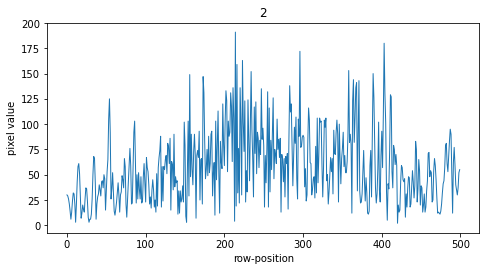

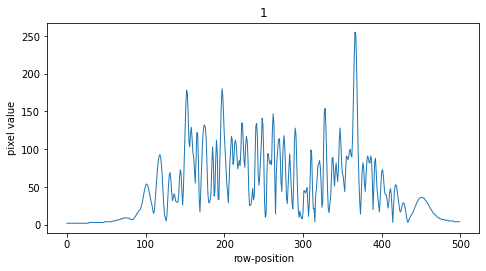

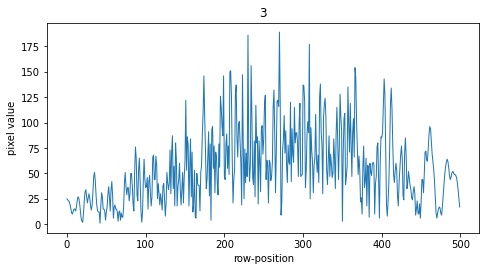

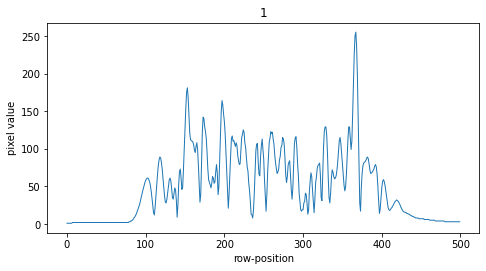

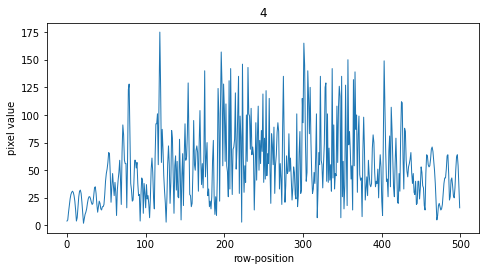

In [15]:
sim = mnc.My_numpy(1, './dat/simdat/pjr/1byte/random/m_500_0.2_2_sim.dat')
sim.simread(1000, 500)
sim.data.shape
sim.save_simwave(1, 10, labels.data, 8, 4, 10, "./dat/simwave/kantou/m_rand")

In [3]:
hei = 20
wid = 32
channels = [16, 32]
kernel = [4, 4]
model = my_model.simnet_cnn_allsize_ver5(len(channels), 1, hei, wid, channels, kernel, 10, 0.5, 64, 0.01)

In [5]:
batchsize = 256
summary(model = model, input_size = (256, 1, hei, wid))

Layer (type:depth-idx)                        Output Shape              Param #
simnet_cnn_allsize_ver5                       --                        --
├─Conv_Bn_LeakyReLu_He_weight: 1-1            [256, 16, 17, 29]         --
│    └─Sequential: 2-1                        [256, 16, 17, 29]         --
│    │    └─Conv2d: 3-1                       [256, 16, 17, 29]         272
│    │    └─BatchNorm2d: 3-2                  [256, 16, 17, 29]         32
│    │    └─LeakyReLU: 3-3                    [256, 16, 17, 29]         --
├─Sequential: 1-2                             [256, 32, 14, 26]         --
│    └─Conv_Bn_LeakyReLu_He_weight: 2-2       [256, 32, 14, 26]         --
│    │    └─Sequential: 3-4                   [256, 32, 14, 26]         8,288
├─Flatten: 1-3                                [256, 11648]              --
├─Dropout: 1-4                                [256, 11648]              --
├─Linear: 1-5                                 [256, 64]                 745,536
├─LeakyReLU